# _Fantasy Football Analytics_

I want to see if I can analyze last season's NFL individual player statistics to create the best team possible. 

First though I have to get the data!

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
os.getcwd()

'/Users/jai/Documents/projects/fantasy-football'

### _Gather Passing Data_

In [5]:
# import libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup

To get things started, I'm just going to focus on pulling the 2018 passing statistics from [pro-football-reference.com](https://www.pro-football-reference.com/). Much like [basketball-reference.com](https://www.basketball-reference.com/), which I used for my first capstone project, I think this website alone will provide the data I need to better analyze NFL players.

### _Test Wrangling Function from custom `football` library_

In [6]:
from football import wrangling

In [7]:
passing_df = wrangling.football_stats(2018, 'passing'); passing_df.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD,year
0,Ben Roethlisberger,PIT,36,QB,16,16,9-6-1,452,675,67.0,5129,34,5.0,16,2.4,97,7.6,7.5,11.3,320.6,96.5,73.0,24,166,7.10,7.04,3.4,2,3,2018
1,Andrew Luck*,IND,29,QB,16,16,10-6-0,430,639,67.3,4593,39,6.1,15,2.3,68,7.2,7.4,10.7,287.1,98.7,71.5,18,134,6.79,6.95,2.7,3,3,2018
2,Matt Ryan,ATL,33,QB,16,16,7-9-0,422,608,69.4,4924,35,5.8,7,1.2,75,8.1,8.7,11.7,307.8,108.1,70.6,42,296,7.12,7.71,6.5,1,1,2018
3,Kirk Cousins,MIN,30,QB,16,16,8-7-1,425,606,70.1,4298,30,5.0,10,1.7,75,7.1,7.3,10.1,268.6,99.7,60.6,40,262,6.25,6.48,6.2,1,0,2018
4,Aaron Rodgers*,GNB,35,QB,16,16,6-9-1,372,597,62.3,4442,25,4.2,2,0.3,75,7.4,8.1,11.9,277.6,97.6,56.8,49,353,6.33,6.96,7.6,3,3,2018


In [86]:
redzone_passing_df = pd.read_csv('data/red_zone_passing.csv', header=1); redzone_passing_df.head()

,Player,Tm,Cmp,Att,Cmp%,Yds,TD,Int,Cmp.1,Att.1,Cmp%.1,Yds.1,TD.1,Int.1,Link
0,Patrick Mahomes\MahoPa00,KAN,66.0,103.0,64.08,488.0,35.0,1.0,27.0,47.0,57.45,103.0,20.0,0.0,All Patrick Mahomes red zone passing plays
1,Andrew Luck\LuckAn00,IND,67.0,100.0,67.00,470.0,33.0,1.0,30.0,43.0,69.77,128.0,19.0,0.0,All Andrew Luck red zone passing plays
2,Russell Wilson\WilsRu00,SEA,36.0,63.0,57.14,289.0,24.0,2.0,18.0,33.0,54.55,81.0,14.0,1.0,All Russell Wilson red zone passing plays
3,Jared Goff\GoffJa00,LAR,59.0,101.0,58.42,421.0,23.0,2.0,25.0,50.0,50.00,118.0,16.0,2.0,All Jared Goff red zone passing plays
4,Matt Ryan\RyanMa00,ATL,48.0,77.0,62.34,389.0,23.0,1.0,21.0,41.0,51.22,103.0,15.0,0.0,All Matt Ryan red zone passing plays


### _Edit `redzone_passing_df`_

`passing_df` looks ok. There are a few things that we need to do to fix it up but the `redzone_passing_df` DataFrame needs **a lot** more work!

In [87]:
qb_list = []

# loop through Player column, split the string and gather the first part with just the name
for qb in range(len(redzone_passing_df)):
    qb_name = redzone_passing_df['Player'].str.split('\\')[qb][0]
    qb_list.append(qb_name)
    
qb_list

['Patrick Mahomes',
 'Andrew Luck',
 'Russell Wilson',
 'Jared Goff',
 'Matt Ryan',
 'Drew Brees',
 'Philip Rivers',
 'Ben Roethlisberger',
 'Kirk Cousins',
 'Baker Mayfield',
 'Deshaun Watson',
 'Eli Manning',
 'Cam Newton',
 'Tom Brady',
 'Mitchell Trubisky',
 'Carson Wentz',
 'Andy Dalton',
 'Aaron Rodgers',
 'Jameis Winston',
 'Derek Carr',
 'Matthew Stafford',
 'Dak Prescott',
 'Case Keenum',
 'Sam Darnold',
 'Joe Flacco',
 'Ryan Fitzpatrick',
 'Marcus Mariota',
 'Nick Mullens',
 'Ryan Tannehill',
 'Blake Bortles',
 'Josh Rosen',
 'Alex Smith',
 'Josh Allen',
 'C.J. Beathard',
 'Jeff Driskel',
 'Nick Foles',
 'Lamar Jackson',
 'Matt Barkley',
 'Chase Daniel',
 'Blaine Gabbert',
 'Jimmy Garoppolo',
 'Brock Osweiler',
 'Josh Johnson',
 'Cody Kessler',
 'Colt McCoy',
 'Kyle Allen',
 'Chris Boswell',
 'Teddy Bridgewater',
 'Tarik Cohen',
 'Mike Glennon',
 'Taylor Heinicke',
 'Josh McCown',
 'Nathan Peterman',
 'Matt Prater',
 'Mohamed Sanu',
 'Kenny Stills',
 'Tyrod Taylor',
 'Derek A

In [88]:
redzone_passing_df['Player'] = qb_list; redzone_passing_df.head()

,Player,Tm,Cmp,Att,Cmp%,Yds,TD,Int,Cmp.1,Att.1,Cmp%.1,Yds.1,TD.1,Int.1,Link
0,Patrick Mahomes,KAN,66.0,103.0,64.08,488.0,35.0,1.0,27.0,47.0,57.45,103.0,20.0,0.0,All Patrick Mahomes red zone passing plays
1,Andrew Luck,IND,67.0,100.0,67.00,470.0,33.0,1.0,30.0,43.0,69.77,128.0,19.0,0.0,All Andrew Luck red zone passing plays
2,Russell Wilson,SEA,36.0,63.0,57.14,289.0,24.0,2.0,18.0,33.0,54.55,81.0,14.0,1.0,All Russell Wilson red zone passing plays
3,Jared Goff,LAR,59.0,101.0,58.42,421.0,23.0,2.0,25.0,50.0,50.00,118.0,16.0,2.0,All Jared Goff red zone passing plays
4,Matt Ryan,ATL,48.0,77.0,62.34,389.0,23.0,1.0,21.0,41.0,51.22,103.0,15.0,0.0,All Matt Ryan red zone passing plays


In [89]:
# drop the miscellaneous last row
redzone_passing_df = redzone_passing_df.iloc[:67]; redzone_passing_df.tail()

,Player,Tm,Cmp,Att,Cmp%,Yds,TD,Int,Cmp.1,Att.1,Cmp%.1,Yds.1,TD.1,Int.1,Link
62,Taysom Hill,NOR,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,All Taysom Hill red zone passing plays
63,Zay Jones,BUF,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,All Zay Jones red zone passing plays
64,DeShone Kizer,GNB,1.0,1.0,100.0,2.0,0.0,0.0,1.0,1.0,100.0,2.0,0.0,0.0,All DeShone Kizer red zone passing plays
65,Geno Smith,LAC,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,All Geno Smith red zone passing plays
66,Dede Westbrook,JAX,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,All Dede Westbrook red zone passing plays


In [90]:
# drop the Link column
redzone_passing_df = redzone_passing_df.drop(labels='Link', axis=1); redzone_passing_df.head()

,Player,Tm,Cmp,Att,Cmp%,Yds,TD,Int,Cmp.1,Att.1,Cmp%.1,Yds.1,TD.1,Int.1
0,Patrick Mahomes,KAN,66.0,103.0,64.08,488.0,35.0,1.0,27.0,47.0,57.45,103.0,20.0,0.0
1,Andrew Luck,IND,67.0,100.0,67.00,470.0,33.0,1.0,30.0,43.0,69.77,128.0,19.0,0.0
2,Russell Wilson,SEA,36.0,63.0,57.14,289.0,24.0,2.0,18.0,33.0,54.55,81.0,14.0,1.0
3,Jared Goff,LAR,59.0,101.0,58.42,421.0,23.0,2.0,25.0,50.0,50.00,118.0,16.0,2.0
4,Matt Ryan,ATL,48.0,77.0,62.34,389.0,23.0,1.0,21.0,41.0,51.22,103.0,15.0,0.0


In [91]:
col_20 = {}

for col in list(redzone_passing_df.columns[2:8]):
    col_20[col] = str(col + '_20')

In [92]:
col_20

{'Cmp': 'Cmp_20',
 'Att': 'Att_20',
 'Cmp%': 'Cmp%_20',
 'Yds': 'Yds_20',
 'TD': 'TD_20',
 'Int': 'Int_20'}

In [93]:
col_10 = {}

for col in list(redzone_passing_df.columns[8:]):
    col_10[col] = col.replace('.1', '') + '_10'
    
print(col_10)

{'Cmp.1': 'Cmp_10', 'Att.1': 'Att_10', 'Cmp%.1': 'Cmp%_10', 'Yds.1': 'Yds_10', 'TD.1': 'TD_10', 'Int.1': 'Int_10'}


In [94]:
col_renames = {**col_20, **col_10}; col_renames

{'Cmp': 'Cmp_20',
 'Att': 'Att_20',
 'Cmp%': 'Cmp%_20',
 'Yds': 'Yds_20',
 'TD': 'TD_20',
 'Int': 'Int_20',
 'Cmp.1': 'Cmp_10',
 'Att.1': 'Att_10',
 'Cmp%.1': 'Cmp%_10',
 'Yds.1': 'Yds_10',
 'TD.1': 'TD_10',
 'Int.1': 'Int_10'}

In [95]:
redzone_passing_df = redzone_passing_df.rename(columns=col_renames); redzone_passing_df.head()

,Player,Tm,Cmp_20,Att_20,Cmp%_20,Yds_20,TD_20,Int_20,Cmp_10,Att_10,Cmp%_10,Yds_10,TD_10,Int_10
0,Patrick Mahomes,KAN,66.0,103.0,64.08,488.0,35.0,1.0,27.0,47.0,57.45,103.0,20.0,0.0
1,Andrew Luck,IND,67.0,100.0,67.00,470.0,33.0,1.0,30.0,43.0,69.77,128.0,19.0,0.0
2,Russell Wilson,SEA,36.0,63.0,57.14,289.0,24.0,2.0,18.0,33.0,54.55,81.0,14.0,1.0
3,Jared Goff,LAR,59.0,101.0,58.42,421.0,23.0,2.0,25.0,50.0,50.00,118.0,16.0,2.0
4,Matt Ryan,ATL,48.0,77.0,62.34,389.0,23.0,1.0,21.0,41.0,51.22,103.0,15.0,0.0


In [96]:
passing_df.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD,year
0,Ben Roethlisberger,PIT,36,QB,16,16,9-6-1,452,675,67.0,5129,34,5.0,16,2.4,97,7.6,7.5,11.3,320.6,96.5,73.0,24,166,7.10,7.04,3.4,2,3,2018
1,Andrew Luck*,IND,29,QB,16,16,10-6-0,430,639,67.3,4593,39,6.1,15,2.3,68,7.2,7.4,10.7,287.1,98.7,71.5,18,134,6.79,6.95,2.7,3,3,2018
2,Matt Ryan,ATL,33,QB,16,16,7-9-0,422,608,69.4,4924,35,5.8,7,1.2,75,8.1,8.7,11.7,307.8,108.1,70.6,42,296,7.12,7.71,6.5,1,1,2018
3,Kirk Cousins,MIN,30,QB,16,16,8-7-1,425,606,70.1,4298,30,5.0,10,1.7,75,7.1,7.3,10.1,268.6,99.7,60.6,40,262,6.25,6.48,6.2,1,0,2018
4,Aaron Rodgers*,GNB,35,QB,16,16,6-9-1,372,597,62.3,4442,25,4.2,2,0.3,75,7.4,8.1,11.9,277.6,97.6,56.8,49,353,6.33,6.96,7.6,3,3,2018


In [97]:
passing_df.shape

(109, 30)

In [98]:
redzone_passing_df.head()

,Player,Tm,Cmp_20,Att_20,Cmp%_20,Yds_20,TD_20,Int_20,Cmp_10,Att_10,Cmp%_10,Yds_10,TD_10,Int_10
0,Patrick Mahomes,KAN,66.0,103.0,64.08,488.0,35.0,1.0,27.0,47.0,57.45,103.0,20.0,0.0
1,Andrew Luck,IND,67.0,100.0,67.00,470.0,33.0,1.0,30.0,43.0,69.77,128.0,19.0,0.0
2,Russell Wilson,SEA,36.0,63.0,57.14,289.0,24.0,2.0,18.0,33.0,54.55,81.0,14.0,1.0
3,Jared Goff,LAR,59.0,101.0,58.42,421.0,23.0,2.0,25.0,50.0,50.00,118.0,16.0,2.0
4,Matt Ryan,ATL,48.0,77.0,62.34,389.0,23.0,1.0,21.0,41.0,51.22,103.0,15.0,0.0


In [99]:
redzone_passing_df.shape

(67, 14)

### _Merge DataFrames_

In [123]:
test_merge_df = passing_df.merge(redzone_passing_df, how='inner', on='Player'); test_merge_df.head()

,Player,Tm_x,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD,year,Tm_y,Cmp_20,Att_20,Cmp%_20,Yds_20,TD_20,Int_20,Cmp_10,Att_10,Cmp%_10,Yds_10,TD_10,Int_10
0,Ben Roethlisberger,PIT,36,QB,16,16,9-6-1,452,675,67.0,5129,34,5.0,16,2.4,97,7.6,7.5,11.3,320.6,96.5,73.0,24,166,7.10,7.04,3.4,2,3,2018,PIT,53.0,94.0,56.38,354.0,21.0,4.0,23.0,38.0,60.53,84.0,14.0,2.0
1,Matt Ryan,ATL,33,QB,16,16,7-9-0,422,608,69.4,4924,35,5.8,7,1.2,75,8.1,8.7,11.7,307.8,108.1,70.6,42,296,7.12,7.71,6.5,1,1,2018,ATL,48.0,77.0,62.34,389.0,23.0,1.0,21.0,41.0,51.22,103.0,15.0,0.0
2,Kirk Cousins,MIN,30,QB,16,16,8-7-1,425,606,70.1,4298,30,5.0,10,1.7,75,7.1,7.3,10.1,268.6,99.7,60.6,40,262,6.25,6.48,6.2,1,0,2018,MIN,48.0,72.0,66.67,302.0,20.0,0.0,16.0,30.0,53.33,59.0,12.0,0.0
3,Case Keenum,DEN,30,QB,16,16,6-10-0,365,586,62.3,3890,18,3.1,15,2.6,64,6.6,6.1,10.7,243.1,81.2,47.9,34,235,5.90,5.39,5.5,3,4,2018,DEN,36.0,69.0,52.17,242.0,11.0,4.0,17.0,35.0,48.57,70.0,8.0,2.0
4,Eli Manning,NYG,37,QB,16,16,5-11-0,380,576,66.0,4299,21,3.6,11,1.9,58,7.5,7.3,11.3,268.7,92.4,51.2,47,358,6.33,6.21,7.5,1,2,2018,NYG,41.0,86.0,47.67,270.0,19.0,2.0,17.0,36.0,47.22,69.0,13.0,1.0


In [124]:
test_merge_df.tail()

,Player,Tm_x,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD,year,Tm_y,Cmp_20,Att_20,Cmp%_20,Yds_20,TD_20,Int_20,Cmp_10,Att_10,Cmp%_10,Yds_10,TD_10,Int_10
49,Chris Boswell,PIT,27,K,15,0,,1,1,100.0,2,1,100.0,0,0.0,2,2.0,22.0,2.0,0.1,118.7,,0,0,2.00,22.00,0.0,,,2018,PIT,1.0,1.0,100.0,2.0,1.0,0.0,1.0,1.0,100.0,2.0,1.0,0.0
50,Zay Jones,BUF,23,WR,16,15,,0,1,0.0,0,0,0.0,0,0.0,0,0.0,0.0,,0.0,39.6,0.0,0,0,0.00,0.00,0.0,,,2018,BUF,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
51,Matt Prater,DET,34,K,16,0,,1,1,100.0,8,1,100.0,0,0.0,8,8.0,28.0,8.0,0.5,139.6,,0,0,8.00,28.00,0.0,,,2018,DET,1.0,1.0,100.0,8.0,1.0,0.0,1.0,1.0,100.0,8.0,1.0,0.0
52,Kenny Stills,MIA,26,WR,15,15,,1,1,100.0,3,1,100.0,0,0.0,3,3.0,23.0,3.0,0.2,118.7,100.0,0,0,3.00,23.00,0.0,,,2018,MIA,1.0,1.0,100.0,3.0,1.0,0.0,1.0,1.0,100.0,3.0,1.0,0.0
53,Dede Westbrook,JAX,25,WR,16,9,,0,1,0.0,0,0,0.0,0,0.0,0,0.0,0.0,,0.0,39.6,11.1,0,0,0.00,0.00,0.0,,,2018,JAX,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0


In [125]:
test_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 43 columns):
Player     54 non-null object
Tm_x       54 non-null object
Age        54 non-null object
Pos        54 non-null object
G          54 non-null object
GS         54 non-null object
QBrec      54 non-null object
Cmp        54 non-null object
Att        54 non-null object
Cmp%       54 non-null object
Yds        54 non-null object
TD         54 non-null object
TD%        54 non-null object
Int        54 non-null object
Int%       54 non-null object
Lng        54 non-null object
Y/A        54 non-null object
AY/A       54 non-null object
Y/C        54 non-null object
Y/G        54 non-null object
Rate       54 non-null object
QBR        54 non-null object
Sk         54 non-null object
Yds        54 non-null object
NY/A       54 non-null object
ANY/A      54 non-null object
Sk%        54 non-null object
4QC        54 non-null object
GWD        54 non-null object
year       54 non-null int6

In [126]:
# drop extra team column
test_merge_df.drop(labels='Tm_y', axis=1, inplace=True)

In [127]:
# rename Tm_x column to Team
test_merge_df.rename(columns={'Tm_x':'Team'}, inplace=True)

In [128]:
test_merge_df.head()

,Player,Team,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD,year,Cmp_20,Att_20,Cmp%_20,Yds_20,TD_20,Int_20,Cmp_10,Att_10,Cmp%_10,Yds_10,TD_10,Int_10
0,Ben Roethlisberger,PIT,36,QB,16,16,9-6-1,452,675,67.0,5129,34,5.0,16,2.4,97,7.6,7.5,11.3,320.6,96.5,73.0,24,166,7.10,7.04,3.4,2,3,2018,53.0,94.0,56.38,354.0,21.0,4.0,23.0,38.0,60.53,84.0,14.0,2.0
1,Matt Ryan,ATL,33,QB,16,16,7-9-0,422,608,69.4,4924,35,5.8,7,1.2,75,8.1,8.7,11.7,307.8,108.1,70.6,42,296,7.12,7.71,6.5,1,1,2018,48.0,77.0,62.34,389.0,23.0,1.0,21.0,41.0,51.22,103.0,15.0,0.0
2,Kirk Cousins,MIN,30,QB,16,16,8-7-1,425,606,70.1,4298,30,5.0,10,1.7,75,7.1,7.3,10.1,268.6,99.7,60.6,40,262,6.25,6.48,6.2,1,0,2018,48.0,72.0,66.67,302.0,20.0,0.0,16.0,30.0,53.33,59.0,12.0,0.0
3,Case Keenum,DEN,30,QB,16,16,6-10-0,365,586,62.3,3890,18,3.1,15,2.6,64,6.6,6.1,10.7,243.1,81.2,47.9,34,235,5.90,5.39,5.5,3,4,2018,36.0,69.0,52.17,242.0,11.0,4.0,17.0,35.0,48.57,70.0,8.0,2.0
4,Eli Manning,NYG,37,QB,16,16,5-11-0,380,576,66.0,4299,21,3.6,11,1.9,58,7.5,7.3,11.3,268.7,92.4,51.2,47,358,6.33,6.21,7.5,1,2,2018,41.0,86.0,47.67,270.0,19.0,2.0,17.0,36.0,47.22,69.0,13.0,1.0


In [129]:
numeric_columns = list(test_merge_df.iloc[:, 7:29].columns); numeric_columns

['Cmp',
 'Att',
 'Cmp%',
 'Yds',
 'TD',
 'TD%',
 'Int',
 'Int%',
 'Lng',
 'Y/A',
 'AY/A',
 'Y/C',
 'Y/G',
 'Rate',
 'QBR',
 'Sk',
 'Yds',
 'NY/A',
 'ANY/A',
 'Sk%',
 '4QC',
 'GWD']

In [140]:
# convert columns to numerics, ignore errors (i.e. the columns we don't want to be numerics)
test_merge_df = test_merge_df.apply(pd.to_numeric, errors='ignore'); test_merge_df.head()

,Player,Team,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD,year,Cmp_20,Att_20,Cmp%_20,Yds_20,TD_20,Int_20,Cmp_10,Att_10,Cmp%_10,Yds_10,TD_10,Int_10
0,Ben Roethlisberger,PIT,36,QB,16,16,9-6-1,452,675,67.0,5129,34,5.0,16,2.4,97,7.6,7.5,11.3,320.6,96.5,73.0,24,166,7.10,7.04,3.4,2.0,3.0,2018,53.0,94.0,56.38,354.0,21.0,4.0,23.0,38.0,60.53,84.0,14.0,2.0
1,Matt Ryan,ATL,33,QB,16,16,7-9-0,422,608,69.4,4924,35,5.8,7,1.2,75,8.1,8.7,11.7,307.8,108.1,70.6,42,296,7.12,7.71,6.5,1.0,1.0,2018,48.0,77.0,62.34,389.0,23.0,1.0,21.0,41.0,51.22,103.0,15.0,0.0
2,Kirk Cousins,MIN,30,QB,16,16,8-7-1,425,606,70.1,4298,30,5.0,10,1.7,75,7.1,7.3,10.1,268.6,99.7,60.6,40,262,6.25,6.48,6.2,1.0,0.0,2018,48.0,72.0,66.67,302.0,20.0,0.0,16.0,30.0,53.33,59.0,12.0,0.0
3,Case Keenum,DEN,30,QB,16,16,6-10-0,365,586,62.3,3890,18,3.1,15,2.6,64,6.6,6.1,10.7,243.1,81.2,47.9,34,235,5.90,5.39,5.5,3.0,4.0,2018,36.0,69.0,52.17,242.0,11.0,4.0,17.0,35.0,48.57,70.0,8.0,2.0
4,Eli Manning,NYG,37,QB,16,16,5-11-0,380,576,66.0,4299,21,3.6,11,1.9,58,7.5,7.3,11.3,268.7,92.4,51.2,47,358,6.33,6.21,7.5,1.0,2.0,2018,41.0,86.0,47.67,270.0,19.0,2.0,17.0,36.0,47.22,69.0,13.0,1.0


In [143]:
# convert Team column to categorical type
test_merge_df['Team'] = test_merge_df['Team'].astype('category'); test_merge_df['Team'].dtypes

CategoricalDtype(categories=['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE',
                  'DAL', 'DEN', 'DET', 'GNB', 'JAX', 'LAC', 'MIA', 'MIN',
                  'NOR', 'NYG', 'NYJ', 'OAK', 'PHI', 'PIT', 'SFO', 'TAM',
                  'TEN', 'WAS'],
                 ordered=False)

In [146]:
# convert Pos and year column to categorical types
test_merge_df[['Pos', 'year']] = test_merge_df[['Pos', 'year']].astype('category')

In [168]:
test_merge_df[['Wins', 'Losses', 'Ties']] = test_merge_df['QBrec'].str.split('-', expand=True).apply(pd.to_numeric).fillna(0).astype('int')

In [184]:
# drop QBrec column because we split it into 3 columns: Wins, Losses, Ties
test_merge_df.drop('QBrec', axis=1, inplace=True)

In [200]:
for k, v in enumerate(list(test_merge_df.columns)):
    print(k, v)

0 Player
1 Team
2 Age
3 Pos
4 G
5 GS
6 Cmp
7 Att
8 Cmp%
9 Yds
10 TD
11 TD%
12 Int
13 Int%
14 Lng
15 Y/A
16 AY/A
17 Y/C
18 Y/G
19 Rate
20 QBR
21 Sk
22 Yds
23 NY/A
24 ANY/A
25 Sk%
26 4QC
27 GWD
28 year
29 Cmp_20
30 Att_20
31 Cmp%_20
32 Yds_20
33 TD_20
34 Int_20
35 Cmp_10
36 Att_10
37 Cmp%_10
38 Yds_10
39 TD_10
40 Int_10
41 Wins
42 Losses
43 Ties


In [218]:
columns_list = list(test_merge_df.columns)

In [222]:
columns_list

['Player',
 'Team',
 'Age',
 'Pos',
 'G',
 'GS',
 'Cmp',
 'Att',
 'Cmp%',
 'Yds',
 'TD',
 'TD%',
 'Int',
 'Int%',
 'Lng',
 'Y/A',
 'AY/A',
 'Y/C',
 'Y/G',
 'Rate',
 'QBR',
 'Sk',
 'Yds',
 'NY/A',
 'ANY/A',
 'Sk%',
 '4QC',
 'GWD',
 'year',
 'Cmp_20',
 'Att_20',
 'Cmp%_20',
 'Yds_20',
 'TD_20',
 'Int_20',
 'Cmp_10',
 'Att_10',
 'Cmp%_10',
 'Yds_10',
 'TD_10',
 'Int_10',
 'Wins',
 'Losses',
 'Ties']

In [223]:
new_columns_list = ['Player','Team','Age','Pos','G','GS','Cmp','Att','Cmp%','Passing_yds','TD','TD%','Int','Int%','Lng','Y/A','AY/A','Y/C',
                    'Y/G','Rate','QBR','Sk','Sk_yds','NY/A','ANY/A','Sk%','4QC','GWD','year','Cmp_20','Att_20','Cmp%_20','Yds_20','TD_20',
                    'Int_20','Cmp_10','Att_10','Cmp%_10','Yds_10','TD_10','Int_10','Wins','Losses','Ties']

In [227]:
test_merge_df.columns = new_columns_list

Text(0.5, 1.0, '2018 NFL Passing Leaders')

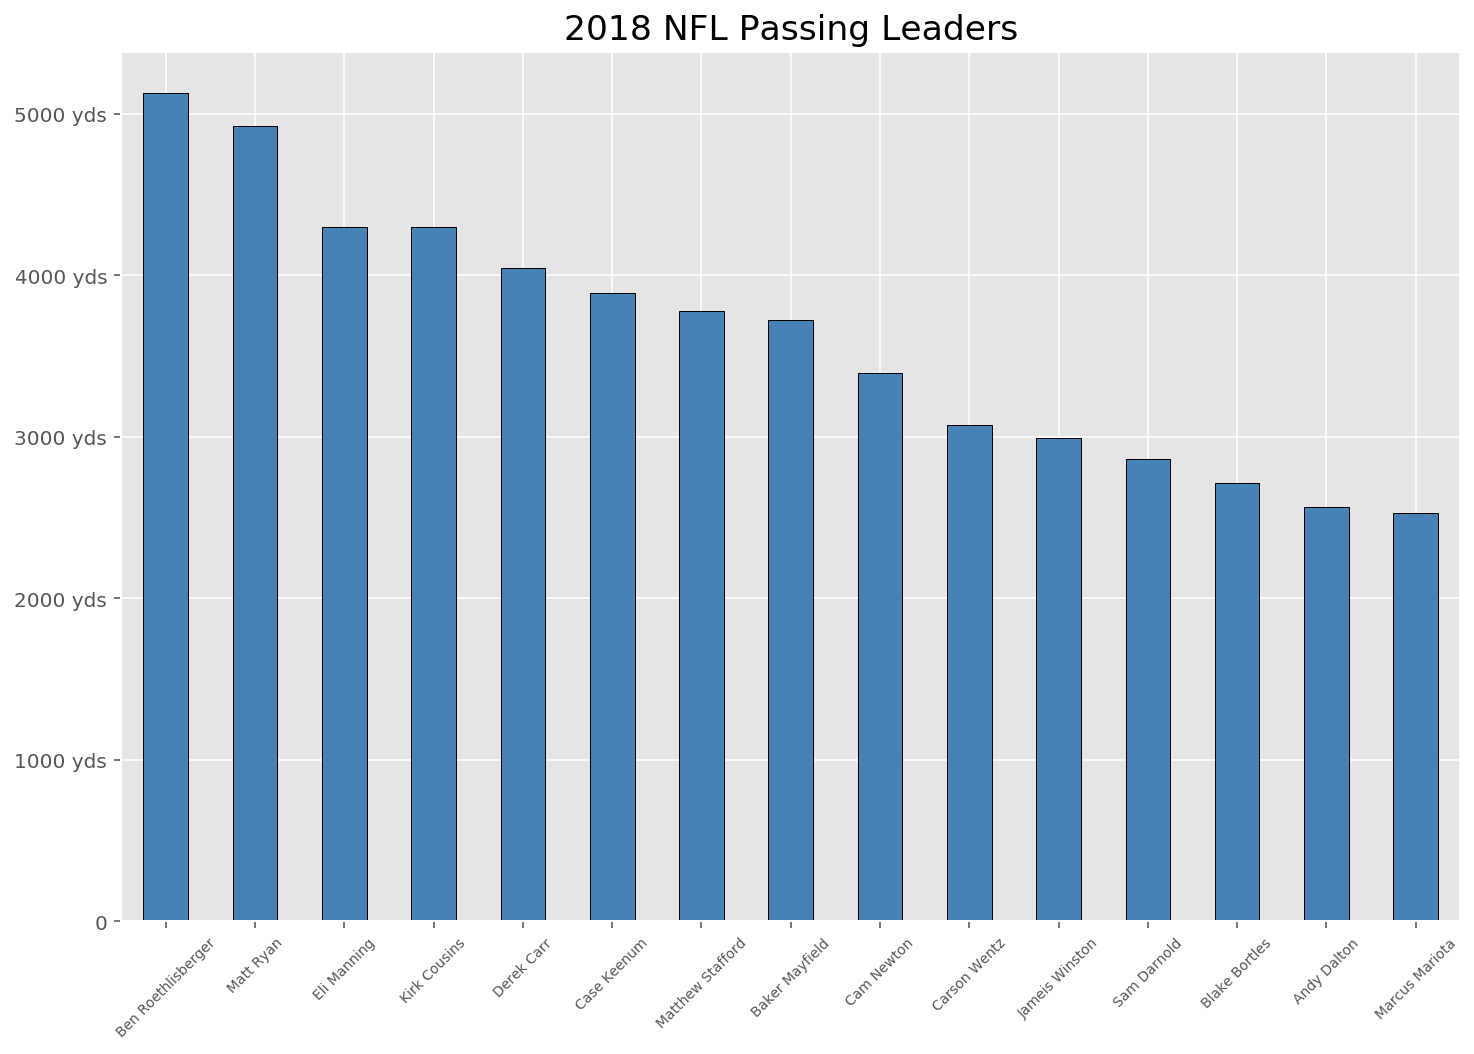

In [261]:
plt.figure(figsize=(12,8))
test_merge_df.set_index(keys='Player').sort_values('Passing_yds', 
                                                   ascending=False)['Passing_yds'][0:15].plot(x='Player', y='Passing_yds', 
                                                                                             kind='bar', color='steelblue',
                                                                                             edgecolor='black')
plt.xticks(fontsize='x-small', rotation=45)
plt.xlabel('')
plt.yticks(np.arange(0, 5500, 1000), ['0', '1000 yds', '2000 yds', '3000 yds', '4000 yds', '5000 yds'])
plt.title('2018 NFL Passing Leaders', fontsize='xx-large')

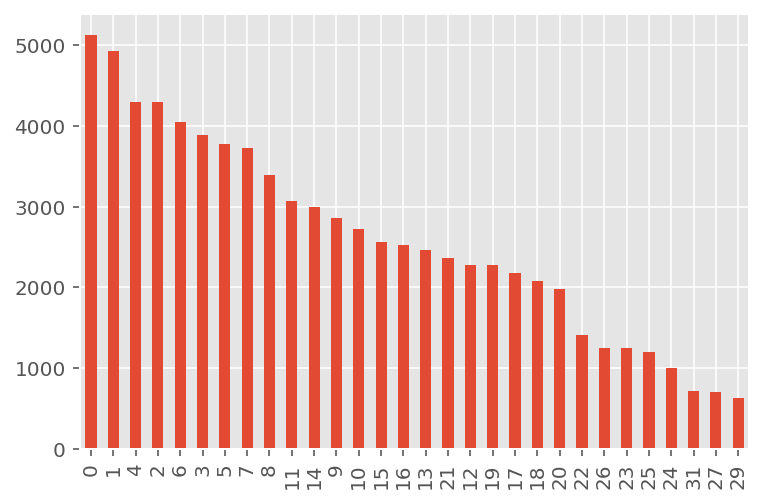

In [236]:
test_merge_df.sort_values(by='Passing_yds', ascending=False)['Passing_yds'][0:30].plot(kind='bar', x='Player')

### _Edit DataFrame_

In [7]:
df.dtypes

Player    object
Tm        object
Age       object
Pos       object
G         object
GS        object
QBrec     object
Cmp       object
Att       object
Cmp%      object
Yds       object
TD        object
TD%       object
Int       object
Int%      object
Lng       object
Y/A       object
AY/A      object
Y/C       object
Y/G       object
Rate      object
QBR       object
Sk        object
Yds       object
NY/A      object
ANY/A     object
Sk%       object
4QC       object
GWD       object
year       int64
dtype: object

In [61]:
df = df.astype({'Player': 'object', 'Tm': 'category', 'Pos': 'category', 'year': 'category'}); df.dtypes

Player      object
Tm        category
Age         object
Pos       category
G           object
GS          object
QBrec       object
Cmp         object
Att         object
Cmp%        object
Yds         object
TD          object
TD%         object
Int         object
Int%        object
Lng         object
Y/A         object
AY/A        object
Y/C         object
Y/G         object
Rate        object
QBR         object
Sk          object
Yds         object
NY/A        object
ANY/A       object
Sk%         object
4QC         object
GWD         object
year      category
dtype: object

In [62]:
df_other = df[['Player', 'Tm', 'Pos', 'year']]
#df.drop(labels=['Player', 'Tm', 'Pos', 'year'], axis=1, inplace=True); df

In [63]:
df.loc[:, 'Tm':].select_dtypes(include='object').apply(pd.to_numeric, errors='coerce')

,Age,G,GS,QBrec,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Lng,Y/A,AY/A,Y/C,Y/G,Rate,QBR,Sk,Yds,NY/A,ANY/A,Sk%,4QC,GWD
0,36.0,16.0,16.0,NaN,452.0,675.0,67.0,5129.0,34.0,5.0,16.0,2.4,97.0,7.6,7.5,11.3,320.6,96.5,73.0,24.0,166.0,7.10,7.04,3.4,2.0,3.0
1,29.0,16.0,16.0,NaN,430.0,639.0,67.3,4593.0,39.0,6.1,15.0,2.3,68.0,7.2,7.4,10.7,287.1,98.7,71.5,18.0,134.0,6.79,6.95,2.7,3.0,3.0
2,33.0,16.0,16.0,NaN,422.0,608.0,69.4,4924.0,35.0,5.8,7.0,1.2,75.0,8.1,8.7,11.7,307.8,108.1,70.6,42.0,296.0,7.12,7.71,6.5,1.0,1.0
3,30.0,16.0,16.0,NaN,425.0,606.0,70.1,4298.0,30.0,5.0,10.0,1.7,75.0,7.1,7.3,10.1,268.6,99.7,60.6,40.0,262.0,6.25,6.48,6.2,1.0,0.0
4,35.0,16.0,16.0,NaN,372.0,597.0,62.3,4442.0,25.0,4.2,2.0,0.3,75.0,7.4,8.1,11.9,277.6,97.6,56.8,49.0,353.0,6.33,6.96,7.6,3.0,3.0
5,30.0,16.0,16.0,NaN,365.0,586.0,62.3,3890.0,18.0,3.1,15.0,2.6,64.0,6.6,6.1,10.7,243.1,81.2,47.9,34.0,235.0,5.90,5.39,5.5,3.0,4.0
6,23.0,16.0,16.0,NaN,383.0,580.0,66.0,5097.0,50.0,8.6,12.0,2.1,89.0,8.8,9.6,13.3,318.6,113.8,82.0,26.0,171.0,8.13,8.89,4.3,2.0,2.0
7,37.0,16.0,16.0,NaN,380.0,576.0,66.0,4299.0,21.0,3.6,11.0,1.9,58.0,7.5,7.3,11.3,268.7,92.4,51.2,47.0,358.0,6.33,6.21,7.5,1.0,2.0
8,41.0,16.0,16.0,NaN,375.0,570.0,65.8,4355.0,29.0,5.1,11.0,1.9,63.0,7.6,7.8,11.6,272.2,97.7,68.8,21.0,147.0,7.12,7.26,3.6,1.0,2.0
9,24.0,16.0,16.0,NaN,364.0,561.0,64.9,4688.0,32.0,5.7,12.0,2.1,70.0,8.4,8.5,12.9,293.0,101.1,65.4,33.0,223.0,7.52,7.69,5.6,4.0,4.0


In [64]:
df.dtypes

Player      object
Tm        category
Age         object
Pos       category
G           object
GS          object
QBrec       object
Cmp         object
Att         object
Cmp%        object
Yds         object
TD          object
TD%         object
Int         object
Int%        object
Lng         object
Y/A         object
AY/A        object
Y/C         object
Y/G         object
Rate        object
QBR         object
Sk          object
Yds         object
NY/A        object
ANY/A       object
Sk%         object
4QC         object
GWD         object
year      category
dtype: object